In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
sys.path.append('..')

from src import utils

from os import path
import joblib
import collections

In [2]:
MODEL_DATE = '20-04-08'

DATAFOLDER_PROCESSED = '/Users/navarmn/Work/Projects/2020-Corona/dev/covid19-data-processing/data/processed'
DATAFOLDER_RAW = '/Users/navarmn/Work/Projects/2020-Corona/data/raw'

STATES = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE',
         'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
         'MG', 'PA', 'PB', 'PR', 'PE', 'PI',
         'RJ', 'RN', 'RO', 'RS', 'RR', 'SC',
         'SE', 'SP', 'TO']

MODELS = ['linear-polynomial', 'gpr', 'linear-regression']

MODELS_DETAILS = {
    'linear-polynomial': "Liner Regression + Polynomial Features degree 4",
    'gpr': "Gaussian Process Regressor - Kernel RBF",
    'linear-regression': "Liner Regression - degree 1"
}

MODELS_PATH = path.join('..', 'models')

VERSION = 0.1

In [3]:
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interactive

from statsmodels.tsa.api import Holt


def holt_predict(X, var_future, smoothing_level=0.5, smoothing_slope=0.05):
    model_holt = Holt(X['y'], exponential=True).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    forecast = model_holt.forecast(var_future)

    # Check if predictions are belows yesterday
#     last_value = porra_df.iloc[-1]['y']
#     forecast = utils.rescale_yhat(forecast.values, last_value)
    return forecast



def f(state='TO', days_to_train=7, days_to_train2=14, smoothing=0.5, slope=0.05):

    df_state = utils.download_state(state=state)
    df_state = df_state[df_state['cases'] != 0]
    dayone = df_state[df_state['cases'] != 0].index[0]
    days = np.array(utils.count_days(dayone=dayone, date_string='%d/%m/%Y'))
    X = days.reshape(-1,1)
    y = utils.get_labels(df_state['cases']).reshape(-1,1)
    X, y = utils.check_inputs(X, y)

    DAYS_TO_TRAIN = days_to_train
    forecast_last_7 = holt_predict(utils.porra(df_state.iloc[-DAYS_TO_TRAIN:]), var_future=14, smoothing_level=smoothing, smoothing_slope=slope)
    y_last_7 = forecast_last_7.values
    X_last_7 = np.arange(X[-1], X[-1]+14, 1)
    X_last_7, y_last_7 = utils.check_inputs(X_last_7, y_last_7)
    ds_last_7 = utils.format_date(df_state.iloc[-DAYS_TO_TRAIN:].index.tolist(), date_string_input='%d/%m/%Y')
    
    
    plt.figure(figsize=(7,5))

    plt.plot(X, y, 'black', linewidth=2, label='Real Data')
    plt.plot(X_last_7, y_last_7, label='Predição futura')

    plt.legend(fontsize=10)
    plt.ylim(0, y[-1]*5)

#     plt.savefig('{}-comparativo.png'.format(state))

    plt.show()
    

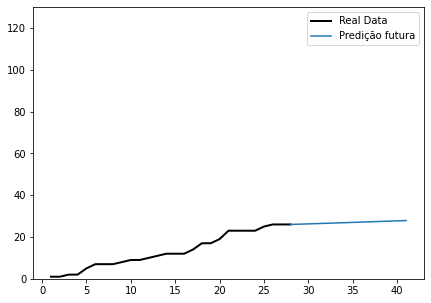

In [4]:
STATES = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE',
         'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
         'MG', 'PA', 'PB', 'PR', 'PE', 'PI',
         'RJ', 'RN', 'RO', 'RS', 'RR', 'SC',
         'SE', 'SP', 'TO']

interactive_plot = interactive(f, state=STATES, days_to_train=(3, 14), smoothing=(0.2, 5, 0.01), slope=(0.01, 3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

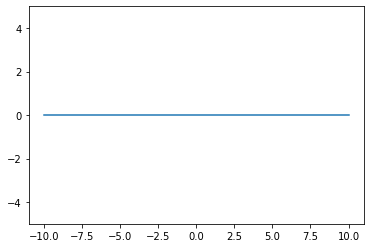

In [5]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot